In [2]:
import Quandl as q
import pandas as pd

In [3]:
symbol = "CME_US1"
database = "CHRIS"
search = "{0}/{1}".format(database, symbol)
frequency = "weekly"
startdate = "2012-01-01"
fast_ma = 10
slow_ma = 40
df = q.get(search, authtoken="xkXtzxzRcDyizWAV9r3_",collapse=frequency,sort_order="asc", trim_start=startdate)
df['Symbol'] = symbol
df.columns

Index([u'Open', u'High', u'Low', u'Last', u'Change', u'Settle', u'Volume', u'Open Interest', u'Symbol'], dtype='object')

In [4]:
# df.columns
# rename Settle to Adj. Close to align with stocks
if 'Settle' in df.columns:
    df=df.rename(columns = {'Settle':'Close_Adj'})
    df=df.rename(columns = {'Open Interest':'OI'})
    df=df.rename(columns = {'Volume':'Volume_Adj'})
if 'Adj. Close' in df.columns:
    df=df.rename(columns = {'Adj. Close':'Close_Adj'})
    df=df.rename(columns = {'Adj. Volume':'Volume_Adj'})
df.columns


Index([u'Open', u'High', u'Low', u'Last', u'Change', u'Close_Adj', u'Volume_Adj', u'OI', u'Symbol'], dtype='object')

In [5]:
%matplotlib inline

In [6]:
import matplotlib.pyplot as plt

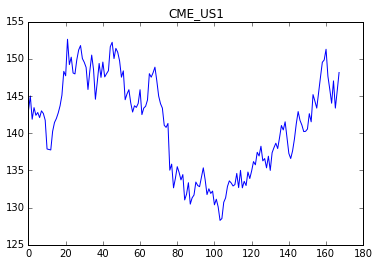

In [7]:
plt.plot(df['Close_Adj'])
plt.title(symbol)


In [8]:
from matplotlib.finance import candlestick_ohlc

In [9]:
pd.options.mode.chained_assignment = None
df_chart = df[(df.index >= '2012-01-01')]
# df_chart.index

# df_chart['MA_Fast'] = pd.rolling_mean(df_chart['Adj. Close'], 10)
df_chart['MA_Fast'] = pd.rolling_mean(df['Close_Adj'], fast_ma)
df_chart['MA_Slow'] = pd.rolling_mean(df['Close_Adj'], slow_ma)
df_chart['MA_Vol'] = pd.rolling_mean(df['Volume_Adj'], fast_ma)


In [10]:
df_chart.Close_Adj

Date
2012-01-08    143.03125
2012-01-15    145.00000
2012-01-22    141.87500
2012-01-29    143.43750
2012-02-05    142.40625
2012-02-12    142.78125
2012-02-19    142.09375
2012-02-26    143.00000
2012-03-04    142.65625
2012-03-11    141.75000
2012-03-18    137.87500
2012-03-25    137.81250
2012-04-01    137.75000
2012-04-08    140.25000
2012-04-15    141.43750
...
2014-12-14    145.18750
2014-12-21    144.31250
2014-12-28    143.37500
2015-01-04    145.50000
2015-01-11    147.53125
2015-01-18    149.53125
2015-01-25    149.84375
2015-02-01    151.28125
2015-02-08    147.65625
2015-02-15    145.90625
2015-02-22    144.03125
2015-03-01    147.03125
2015-03-08    143.37500
2015-03-15    145.68750
2015-03-22    148.15625
Name: Close_Adj, Length: 168

In [11]:
type(df_chart.index)

pandas.tseries.index.DatetimeIndex

In [84]:
from matplotlib import cm
import numpy as np

def chart(data, series, x, y, title):

    fig = plt.figure(figsize=(12, 10))

    ax = fig.add_subplot(1, 1, 1)

    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    y_min_val = min(data[series[0]])-10
    y_max_val = max(data[series[0]])+10
    ax.set_ylim(y_min_val, y_max_val)

    ax.xaxis.set_ticks_position('bottom')

    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    
    cmaps = [('Sequential',     ['Blues', 'BuGn', 'BuPu',
                             'GnBu', 'Greens', 'Greys', 'Oranges', 'OrRd',
                             'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdPu',
                             'Reds', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd']),
         ('Sequential (2)', ['afmhot', 'autumn', 'bone', 'cool', 'copper',
                             'gist_heat', 'gray', 'hot', 'pink',
                             'spring', 'summer', 'winter']),
         ('Diverging',      ['BrBG', 'bwr', 'coolwarm', 'PiYG', 'PRGn', 'PuOr',
                             'RdBu', 'RdGy', 'RdYlBu', 'RdYlGn', 'Spectral',
                             'seismic']),
         ('Qualitative',    ['Accent', 'Dark2', 'Paired', 'Pastel1',
                             'Pastel2', 'Set1', 'Set2', 'Set3']),
         ('Miscellaneous',  ['gist_earth', 'terrain', 'ocean', 'gist_stern',
                             'brg', 'CMRmap', 'cubehelix',
                             'gnuplot', 'gnuplot2', 'gist_ncar',
                             'nipy_spectral', 'jet', 'rainbow',
                             'gist_rainbow', 'hsv', 'flag', 'prism'])]
    
    ax.set_color_cycle([plt.cm.terrain(i) for i in np.linspace(0, 1, len(series))])
    
    for s in series:
        # if it's the main series, embolden it
        lw = 2.5 if series.index(s) == 0 else 1.5
        ls = '-' #if series.index(s) == 0 else '--'
        ax.plot(data.index, data[s], linewidth=lw, linestyle=ls)

    return plt 

In [85]:
s = ['Close_Adj', 'MA_Fast','MA_Slow']
min(df_chart[s[0]])-10

118.28125

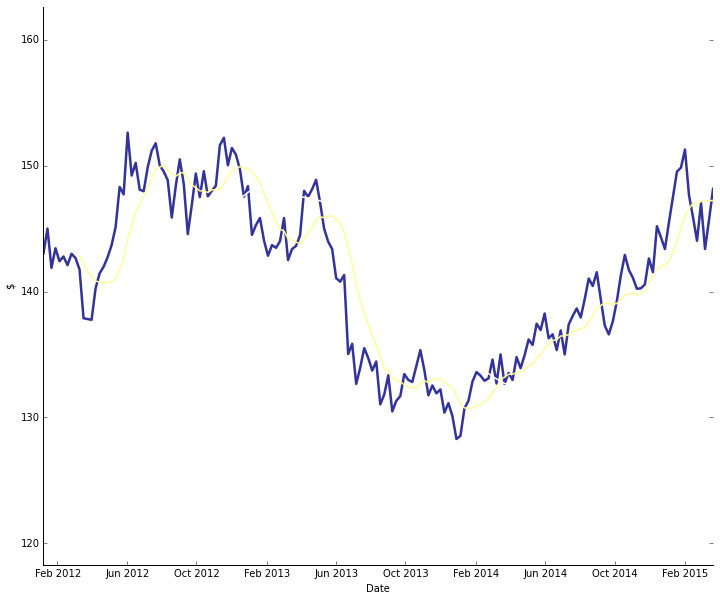

In [86]:


plt = chart(df_chart, s, 'Date', '$', '')


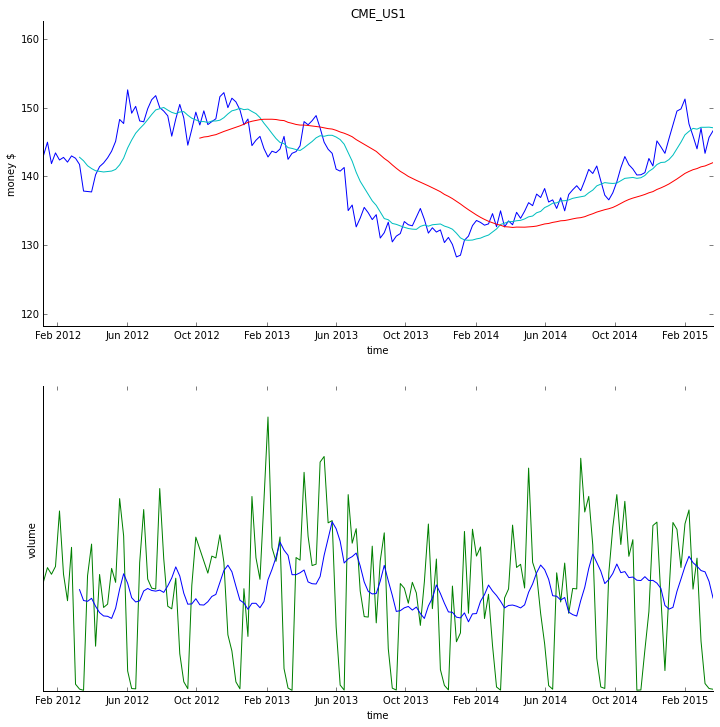

In [13]:
# plt.xkcd()
# color = dict(close='DarkBlue', ma_slow='DarkOrange', volume='Gray')
# import seaborn as sns
# sns.set_style("white")
# sns.set_style("ticks")

fig = plt.figure(figsize=(12, 12))

ax = fig.add_subplot(2, 1, 1)

# sns.despine()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# plt.xticks([])
# plt.yticks([])
ax.set_ylim([min(df_chart['Close_Adj'])-10, max(df_chart['Close_Adj'])+10])

ax.xaxis.set_ticks_position('bottom')
# ax.set_xticklabels(['CONFIRMED BY\nEXPERIMENT', 'REFUTED BY\nEXPERIMENT'])
# plt.yticks([])

plt.title(symbol)
plt.xlabel('time')
plt.ylabel('money $')

# plt.annotate(
#     'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
#     xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

ax.plot(df_chart.index, df_chart['Close_Adj'], color="b")
ax.plot(df_chart.index, df_chart['MA_Fast'], color="c")
ax.plot(df_chart.index, df_chart['MA_Slow'], color="r")

ax_bottom = fig.add_subplot(2, 1, 2)
ax_bottom.plot(df_chart.index, df_chart['Volume_Adj'], color="g")
ax_bottom.plot(df_chart.index, df_chart['MA_Vol'])
ax_bottom.spines['right'].set_color('none')
ax_bottom.spines['top'].set_color('none')

# plt.xticks([])
plt.yticks([])
plt.xlabel('time')
plt.ylabel('volume')

# plt.plot()

plt.show()

In [33]:
# fig, ax = plt.subplots()
# fig.subplots_adjust(bottom=0.2)
# candlestick_ohlc(ax, (df_chart.Open, df_chart.High, df_chart.Low,df_chart['Adj. Close']), width=0.1)

# ax.xaxis_date()
# ax.autoscale_view()
# plt.setp( plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# plt.show()

In [34]:
# plt.xkcd()

# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
# ax.spines['right'].set_color('none')
# ax.spines['top'].set_color('none')
# plt.xticks([])
# plt.yticks([])
# # ax.set_ylim([-30, 10])

# # plt.annotate(
# #     'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
# #     xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

# plt.plot(df_chart.Settle)

# plt.xlabel('time')
# plt.ylabel('$')
# plt.show()

In [35]:
# from matplotlib.widgets import Cursor
# import numpy as np
# import matplotlib.pyplot as plt2


# fig2 = plt2.figure(figsize=(8, 6))
# ax2 = fig2.add_subplot(111, axisbg='#FFFFCC')

# x, y = 4*(np.random.rand(2, 100)-.5)
# ax2.plt2(x, y, 'o')
# ax2.set_xlim(-2, 2)
# ax2.set_ylim(-2, 2)

# # set useblit = True on gtkagg for enhanced performance
# cursor = Cursor(ax2, useblit=True, color='red', linewidth=2 )

# plt2.show()

In [36]:
df_chart

,Open,High,Low,Last,Change,Close_Adj,Volume_Adj,OI,Symbol,MA_Fast,MA_Slow,MA_Vol
Date,,,,,,,,,,,,
2012-01-08,142.06250,143.03125,142.06250,NaN,NaN,143.03125,286468,585984,CME_US1,NaN,NaN,NaN
2012-01-15,144.03125,145.00000,144.03125,NaN,NaN,145.00000,323809,640435,CME_US1,NaN,NaN,NaN
2012-01-22,142.50000,142.50000,141.87500,NaN,NaN,141.87500,306293,619548,CME_US1,NaN,NaN,NaN
2012-01-29,142.25000,143.43750,142.25000,NaN,NaN,143.43750,326782,615327,CME_US1,NaN,NaN,NaN
2012-02-05,144.81250,144.81250,142.40625,NaN,NaN,142.40625,472681,619994,CME_US1,NaN,NaN,NaN
2012-02-12,142.53125,142.78125,142.53125,NaN,NaN,142.78125,306660,594900,CME_US1,NaN,NaN,NaN
2012-02-19,141.87500,142.09375,141.87500,NaN,NaN,142.09375,236820,594643,CME_US1,NaN,NaN,NaN
2012-02-26,142.75000,143.03125,142.68750,NaN,NaN,143.00000,377101,429801,CME_US1,NaN,NaN,NaN
2012-03-04,142.65625,142.65625,142.65625,NaN,NaN,142.65625,17328,22805,CME_US1,NaN,NaN,NaN


UnboundLocalError: local variable 'x' referenced before assignment

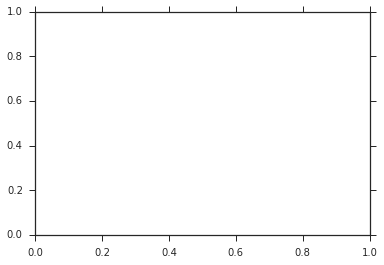

In [43]:
import seaborn as sns
color_map = dict(pos="indianred", neg="steelblue")
ax = sns.tsplot(df_chart) #, time=df_chart.index.name, value="Close_Adj", color=color_map)
# ax.set_xlabel("time (seconds)");
